## Betting on the Corner 🚩

📆 Publish date: 

This notebook supports the research behind this blogpost.

------------------

**Disclaimer:** All code is for educational and personal purposes only. This is not ivestment or betting advice.

In [15]:
from data.sources.fotmob.extractor import *
import os
import urllib

In [61]:
# Libraries for visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
from highlight_text import ax_text, fig_text
from PIL import Image
import seaborn as sns

In [149]:
# Add pretty fonts

for x in os.listdir("visualizations/fonts"):
    for y in os.listdir(f"visualizations/fonts/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"visualizations/fonts/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y)
            except:
                continue

plt.style.use("kellys_style.mpl")


In [4]:
matches = pd.read_csv("data/database/match_ids.csv")

# Filter championship match id's and only get matches for this season.
efl_matches = matches[(matches["leagueId"] == 48) & (matches["date"] > "2021-06-15")].copy()
efl_matches.sort_values(by = "date")

,match_id,leagueId,tournamentStage,finished,cancelled,date,venue,team_id
272335,3619437,48,1,True,False,2021-08-06 20:45:00,H,8678
272441,3619437,48,1,True,False,2021-08-06 20:45:00,A,8659
274132,3619446,48,1,True,False,2021-08-07 16:00:00,A,9798
274131,3619444,48,1,True,False,2021-08-07 16:00:00,A,10004
274130,3619443,48,1,True,False,2021-08-07 16:00:00,A,8667
...,...,...,...,...,...,...,...,...
344035,3620423,48,38,True,False,2022-03-16 20:45:00,H,8669
344034,3620525,48,38,True,False,2022-03-16 20:45:00,H,8344
344033,3620422,48,38,True,False,2022-03-16 20:45:00,H,8483
344161,3620423,48,38,True,False,2022-03-16 20:45:00,A,8667


### Match Data

Let's go ahead and compile the stats for this season's EFL Championship games.

In [5]:
data = fotmob_match_stats_pool(list(efl_matches["match_id"].unique()), melted=True)

100%|██████████| 446/446 [03:39<00:00,  2.03it/s]


### Not Your Average-Joe

Here I want to create a couple of charts that showcase the effect of overdispersion.

In [197]:
# Corners summary statistics by team.
corners = data[data["variable"].isin(["corners_for","corners_ag"])]
corners = corners.groupby(["variable","team_name"])["value"].agg(["mean","median","var"]).reset_index()
corners.sort_values(by = "mean", ascending = False).head()

,variable,team_name,mean,median,var
33,corners_for,Fulham,6.405405,6.0,6.414414
31,corners_for,Coventry City,6.135135,6.0,9.175676
5,corners_ag,Bristol City,6.105263,6.0,8.637269
37,corners_for,Middlesbrough,5.891892,6.0,12.043544
47,corners_for,West Bromwich Albion,5.864865,6.0,6.342342


In [198]:
mid_corners = data[(data["variable"].isin(["corners_for"])) & (data["team_name"] == "Fulham")].copy()
mid_corners.tail()

,match_id,date,referee,variable,value,venue,team_id,team_name,team_lineup
17627,3619808,2022-02-12 09:00:00,None,corners_for,4,A,9879,Fulham,4 - 2 - 3 - 1
18529,3620519,2022-02-26 09:00:00,None,corners_for,9,A,9879,Fulham,4 - 2 - 3 - 1
18947,3619768,2022-03-08 13:45:00,None,corners_for,5,A,9879,Fulham,4 - 2 - 3 - 1
19123,3620406,2022-03-12 06:30:00,None,corners_for,5,A,9879,Fulham,4 - 2 - 3 - 1
19585,3620421,2022-03-15 14:00:00,None,corners_for,8,A,9879,Fulham,4 - 2 - 3 - 1


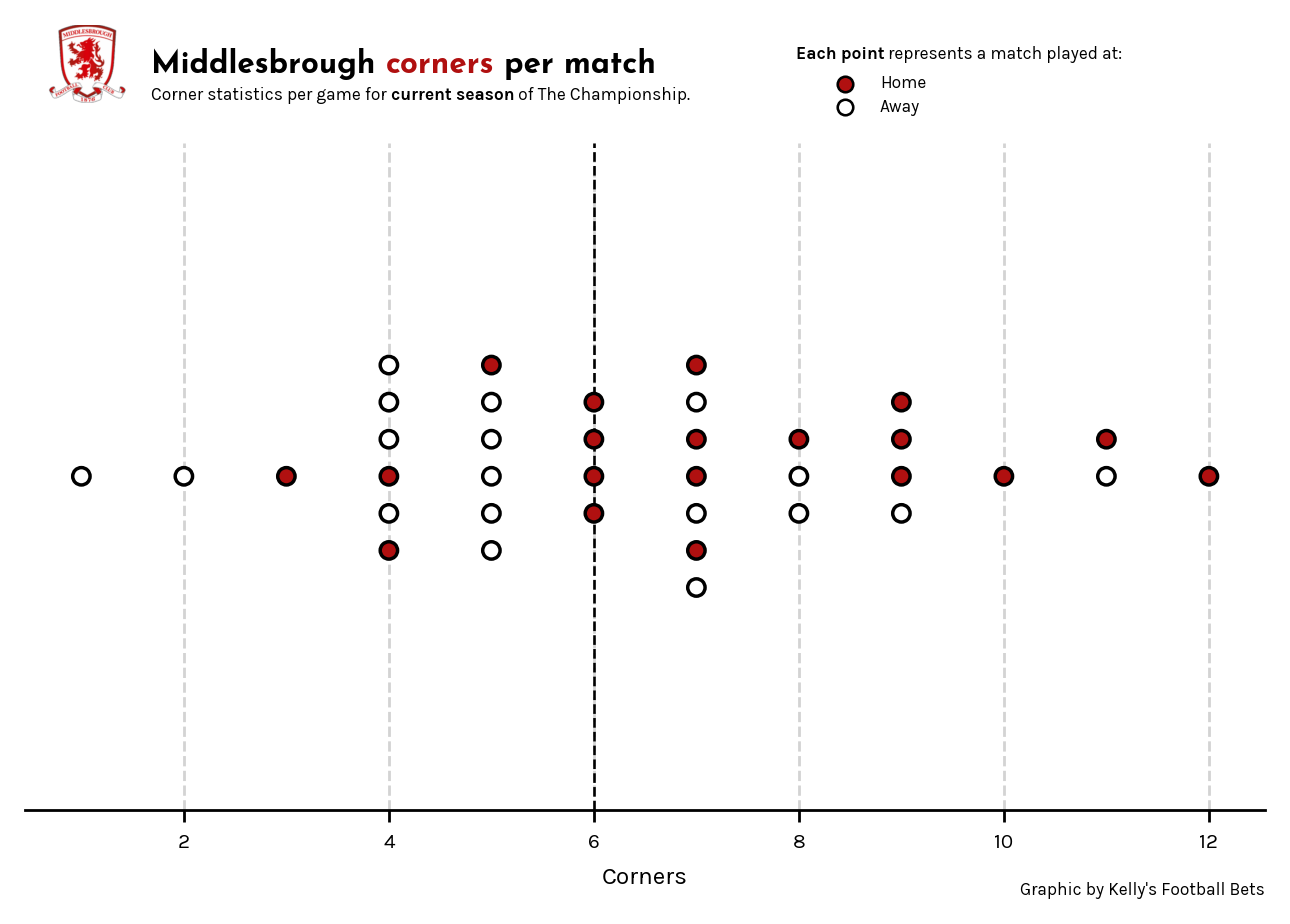

In [199]:
fig = plt.figure(figsize=(5,3.5), dpi = 250, facecolor="white")
gspec = gridspec.GridSpec(
    ncols=3, nrows=3, figure=fig, height_ratios=[0.1,0.05,0.85], width_ratios = [0.1,.5,.4]
)

# -----------------------------
# Logo ax
logo_ax = plt.subplot(gspec[0,0])
team_icon = Image.open(urllib.request.urlopen(f"https://images.fotmob.com/image_resources/logo/teamlogo/{8549}.png"))
logo_ax.imshow(team_icon)
logo_ax.axis("off")


# -----------------
# Title axes

title_ax = plt.subplot(gspec[0,1])
title_ax.set_axis_off()
ax_text(x = 0, y = 0.5,
    s = "Middlesbrough <corners> per match",
    highlight_textprops=[{"color":"#B01010"}],
    ax = title_ax,
    size = 9,
    family = "Josefin Sans",
    ha = "left",
    va = "center",
    weight = "bold"
)

# -----------------
# Subtitle axes

sub_ax = plt.subplot(gspec[1,1:2])
sub_ax.set_axis_off()
ax_text(x = 0, y = 1.2,
    s = "Corner statistics per game for <current season> of The Championship.",
    highlight_textprops=[{"weight":"bold"}],
    ax = sub_ax,
    size = 5,
    ha = "left",
    va = "center",
)


# -----------------
# Legend axes

leg_ax = plt.subplot(gspec[:2,2])
leg_ax.set_axis_off()
leg_ax.set_ylim(0,1)
leg_ax.set_xlim(0,1)
ax_text(x = 0.05, y = 0.75,
    s = "<Each point> represents a match played at:",
    highlight_textprops=[{"weight":"bold"}],
    ax = leg_ax,
    size = 5,
    family = "Karla",
    ha = "left",
    va = "center",
    annotationbbox_kw={"xycoords":"data"}
)

leg_ax.scatter(x = 0.15, y = 0.5, s = 20, color = "#B01010", edgecolor ="black", linewidth = 0.75, zorder = 3)
leg_ax.scatter(x = 0.15, y = 0.3, s = 20, color = "white", edgecolor ="black", linewidth = 0.75, zorder = 3)
leg_ax.annotate(
    xy = (0.15,0.5),
    xytext = (10,0),
    text = "Home",
    textcoords = "offset points",
    va = "center",
    fontsize = 5
)

leg_ax.annotate(
    xy = (0.15,0.3),
    xytext = (10,0),
    text = "Away",
    textcoords = "offset points",
    va = "center",
    fontsize = 5
)

# -----------------
# Data axes

data_ax = plt.subplot(gspec[2,:])
data_ax.spines["left"].set_visible(False)
data_ax.get_yaxis().set_visible(False)
enmax_palette = ["#B01010", "white"]
sns.set_palette(palette=enmax_palette)
sns.swarmplot(x="value", y = "team_name", ax = data_ax, hue = "venue", data = mid_corners, dodge = False, edgecolor ="black", linewidth = 1, size=5)
data_ax.legend([],[], frameon = False)
data_ax.xaxis.set_label_text("Corners")
data_ax.plot([mid_corners["value"].median(),mid_corners["value"].median()],[data_ax.get_ylim()[0],data_ax.get_ylim()[1]], 
            ls = "--", color = "black", zorder = 2, lw = 0.75, marker = "")

fig.text(0.8, 0, "Graphic by Kelly's Football Bets", fontsize=5)
gspec.tight_layout(fig, pad=0.2, w_pad=0.1, h_pad=0)



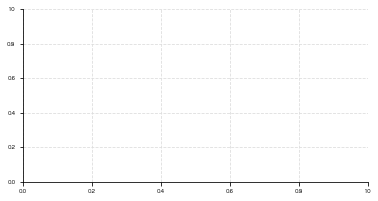

In [87]:
fig = plt.figure()
ax = plt.subplot()

Text(0.6, 0.1, "Graphic by Kelly's Football Bets")

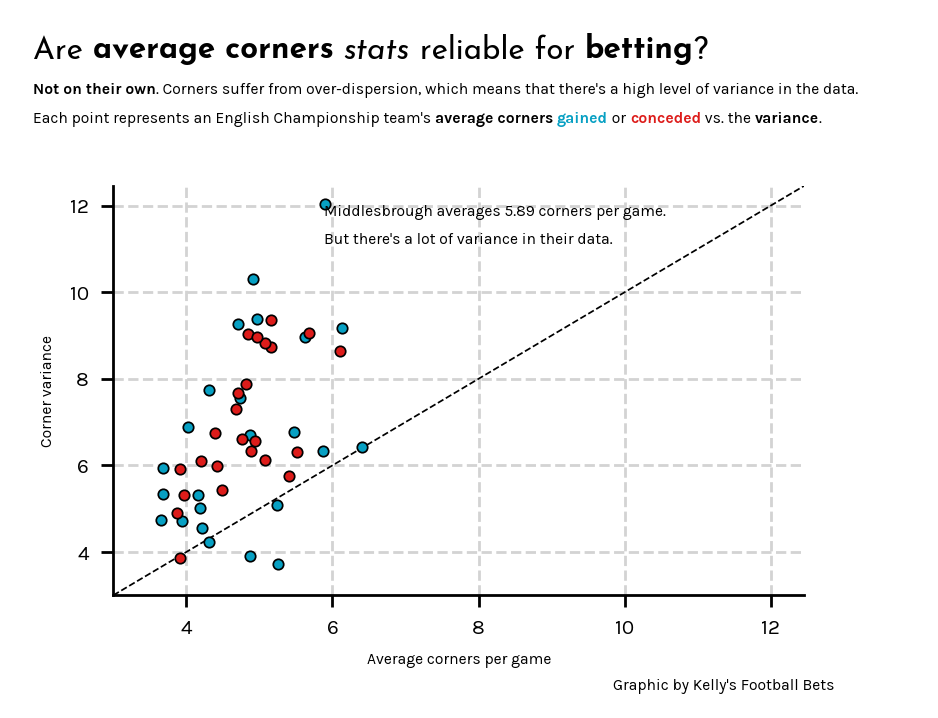

In [202]:
fig = plt.figure(figsize=(4,3.75), dpi = 250, facecolor="white")
gspec = gridspec.GridSpec(
    ncols=2, nrows=3, figure=fig, height_ratios=[0.1,0.075,0.825], width_ratios = [0.95,0.05]
)

title_ax = plt.subplot(gspec[0,:])

# -----------------
# Title axes

title_ax.set_axis_off()
ax_text(x = -0.1, y = 1,
    s = "Are <average corners> <stats> reliable for <betting>?",
    highlight_textprops=[{"weight":"bold"}, {"style":"italic"},{"weight":"bold"}],
    ax = title_ax,
    size = 9,
    family = "Josefin Sans"
)

ax_text(x = -0.1, y = 0,
    s = "<Not on their own>. Corners suffer from over-dispersion, which means that there's a high level of variance in the data.\nEach point represents an English Championship team's <average corners> <gained> or <conceded> vs. the <variance>.",
    highlight_textprops=[{"weight":"bold"},{"weight":"bold"},{"weight":"bold","color":"#07A0C3"},{"weight":"bold","color":"#DD1C1A"},{"weight":"bold"}],
    ax = title_ax,
    size = 4.5
)

# -----------------
# Data axes

data_ax1 = plt.subplot(gspec[2,0])

data_ax1.scatter(corners[corners["variable"] == "corners_for"]["mean"], 
                corners[corners["variable"] == "corners_for"]["var"],
                zorder = 3,
                color = "#07A0C3",
                edgecolor = "black",
                lw = 0.5,
                s = 9)
data_ax1.scatter(corners[corners["variable"] == "corners_ag"]["mean"], 
                corners[corners["variable"] == "corners_ag"]["var"],
                zorder = 3,
                color = "#DD1C1A",
                edgecolor = "black",
                lw = 0.5,
                s = 9)

data_ax1.set_ylim(3,data_ax1.get_ylim()[1])
data_ax1.set_xlim(3,data_ax1.get_ylim()[1])


data_ax1.plot([0,1],[0,1], ls = "--", color = "black", zorder = 2, lw = 0.5, marker = "", transform=data_ax1.transAxes)

data_ax1.set_xlabel("Average corners per game", size = 4.5)
data_ax1.set_ylabel("Corner variance", size = 4.5)

ax_text(x = 5.89, y = 12.04, s = f"Middlesbrough averages {5.89} corners per game.\nBut there's a lot of variance in their data.", fontsize = 4.5)

fig.text(0.6, 0.1, "Graphic by Kelly's Football Bets", fontsize=4.5)


In [25]:
corners = data[data["variable"].isin(["score_for","score_ag"])]
corners = corners.groupby(["match_id","team_name","venue"])["value"].sum().reset_index()
corners = corners.groupby(["team_name","venue"])["value"].apply(lambda x: (x > 1).sum()/(x).count()).reset_index(name='count')
corners.pivot(index = ["team_name"], columns = "venue")


count          
venue                        A         H
team_name                               
AFC Bournemouth       0.588235  0.944444
Barnsley              0.777778  0.578947
Birmingham City       0.789474  0.789474
Blackburn Rovers      0.555556  0.700000
Blackpool             0.764706  0.550000
Bristol City          0.894737  0.789474
Cardiff City          0.888889  0.600000
Coventry City         0.705882  0.700000
Derby County          0.600000  0.666667
Fulham                0.722222  0.894737
Huddersfield Town     0.700000  0.722222
Hull City             0.600000  0.722222
Luton Town            0.777778  0.684211
Middlesbrough         0.736842  0.833333
Millwall              0.611111  0.684211
Nottingham Forest     0.764706  0.894737
Peterborough United   0.894737  0.666667
Preston North End     0.550000  0.777778
Queens Park Rangers   0.833333  0.736842
Reading               0.736842  0.777778
Sheffield United      0.650000  0.647059
Stoke City            0.736842  0.666667
Swansea City          0.736842  0.588235
West Bromwich Albion  0.631579  0.611111

In [23]:
data[(data["team_name"] == "Luton Town") & (data["variable"] == "score_for")]

,match_id,date,referee,variable,value,venue,team_id,team_name,team_lineup
88,3619442,2021-08-07 09:00:00,None,score_for,3.0,H,8346,Luton Town,4 - 3 - 3
990,3619474,2021-08-21 09:00:00,None,score_for,0.0,H,8346,Luton Town,3 - 4 - 1 - 2
1254,3619484,2021-08-28 09:00:00,None,score_for,0.0,H,8346,Luton Town,4 - 2 - 3 - 1
1980,3619593,2021-09-18 09:00:00,None,score_for,3.0,H,8346,Luton Town,3 - 5 - 2
2574,3619536,2021-09-29 13:45:00,None,score_for,5.0,H,8346,Luton Town,3 - 4 - 1 - 2
2838,3619545,2021-10-02 09:00:00,None,score_for,0.0,H,8346,Luton Town,3 - 4 - 1 - 2
3696,3619575,2021-10-23 09:00:00,None,score_for,1.0,H,8346,Luton Town,3 - 4 - 3
3740,3619616,2021-11-02 13:45:00,None,score_for,3.0,H,8346,Luton Town,3 - 5 - 2
4246,3619631,2021-11-06 09:00:00,None,score_for,0.0,H,8346,Luton Town,3 - 5 - 2
5148,3619756,2021-11-27 09:00:00,None,score_for,1.0,H,8346,Luton Town,5 - 3 - 2
